<a href="https://colab.research.google.com/github/ThinkSmartFast/AI-Driven-Linguistic-Analysis-of-Political-Speeches/blob/main/Constructions_Detected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
Sentence: We both ran to the
gun-room door, but it was locked and we had to go round to the
window.
 → Found: Passive

Sentence: Japp had
two or three hours’ start of me, and his anxiety to be gone made
me keen to be close at his heels.
 → Found: Passive

Sentence: The gun-room door was locked on the inside, and we
had to go right round the house to the window.
 → Found: Passive

Sentence: My poor
uncle”—her voice faltered—“had been shot through the head.
 → Found: Passive

Sentence: A pair of
revolvers of my husband’s were mounted upon the wall.
 → Found: Passive

Sentence: But the body has been
removed.”
 → Found: Passive

Sentence: I
was left to undertake my investigations alone.
 → Found: Passive

Sentence: Accordingly I took leave of the Haverings, and was driven
off in the car that had brought us up from the station.
 → Found: Passive

Sentence: He had been shot through the back
of the head, and the revolver had been discharged a

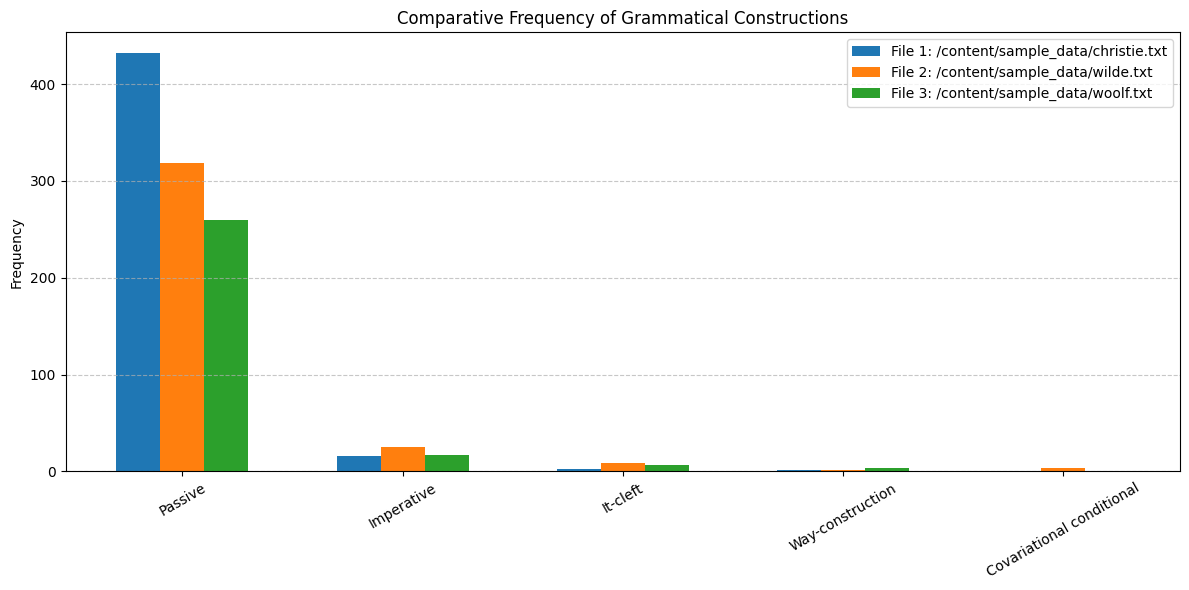

In [ ]:
import spacy
import re
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

# Load English model
nlp = spacy.load("en_core_web_sm")

# --- Construction Detection Functions ---

def is_passive(sent):
    return any(token.dep_ == "auxpass" for token in sent)

def is_imperative(sent):
    if sent and sent[0].pos_ == "VERB" and sent[0].tag_ == "VB":
        return not any(tok.dep_ in ("nsubj", "nsubjpass") for tok in sent)
    return False

def is_it_cleft(sent):
    if sent[0].text.lower() == "it" and len(sent) > 3:
        if sent[1].lemma_ == "be":
            for i in range(2, len(sent)-1):
                if sent[i].text.lower() == "who":
                    return True
    return False

def is_way_construction(sent):
    for i in range(len(sent) - 2):
        if sent[i].lemma_ in ["make", "fight", "push", "find", "feel"] and sent[i+2].lemma_ == "way":
            return True
    return False

def is_covariational_conditional(sent):
    return bool(re.search(r'\bthe more\b.*,\s*\bthe', sent.text.lower()))

def analyze_text(text):
    doc = nlp(text)
    results = []
    for sent in doc.sents:
        constructions = []
        if is_passive(sent):
            constructions.append("Passive")
        if is_imperative(sent):
            constructions.append("Imperative")
        if is_it_cleft(sent):
            constructions.append("It-cleft")
        if is_way_construction(sent):
            constructions.append("Way-construction")
        if is_covariational_conditional(sent):
            constructions.append("Covariational conditional")
        results.append((sent.text.strip(), constructions))
    return results

# --- File Processing Function ---

def process_files(filepaths):
    all_counts = {}
    for filepath in filepaths:
        with open(filepath, 'r', encoding='utf-8') as f:
            text = f.read()

        print(f"\n--- Analyzing: {filepath} ---")
        results = analyze_text(text)
        counter = Counter()
        for sent, types in results:
            if types:
                print(f"\nSentence: {sent}")
                print(f" → Found: {', '.join(types)}")
                counter.update(types)
        all_counts[filepath] = counter
    return all_counts

# --- Plotting Function ---

def plot_comparative_bar_chart(data_dict):
    construction_types = ['Passive', 'Imperative', 'It-cleft', 'Way-construction', 'Covariational conditional']
    files = list(data_dict.keys())
    num_files = len(files)

    x = list(range(len(construction_types)))
    bar_width = 0.2
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 3 distinct colors for 3 files

    plt.figure(figsize=(12, 6))

    for i, filename in enumerate(files):
        counts = [data_dict[filename].get(typ, 0) for typ in construction_types]
        positions = [pos + i * bar_width for pos in x]
        plt.bar(positions, counts, width=bar_width, label=f'File {i+1}: {filename}', color=colors[i])

    # Set X-tick labels in the middle of grouped bars
    mid_positions = [pos + (bar_width * (num_files - 1)) / 2 for pos in x]
    plt.xticks(mid_positions, construction_types, rotation=30)
    plt.ylabel("Frequency")
    plt.title("Comparative Frequency of Grammatical Constructions")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# --- Main Execution ---

if __name__ == "__main__":
    files = ["/content/sample_data/christie.txt", "/content/sample_data/wilde.txt", "/content/sample_data/woolf.txt"]  # Replace with your actual filenames
    counts = process_files(files)
    plot_comparative_bar_chart(counts)
